In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = 'abc.xlsx'  
data = pd.read_excel(file_path)

In [3]:
data = data.drop(['customer_id', 'phone_no'], axis=1)

# Encode categorical columns (e.g., 'gender', 'multi_screen', 'mail_subscribed')
label_encoders = {}
for column in ['gender', 'multi_screen', 'mail_subscribed']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [4]:
# Define features (X) and target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [6]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.63
Recall: 0.55
F1 Score: 0.59


In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[338  15]
 [ 21  26]]


In [8]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       353
           1       0.63      0.55      0.59        47

    accuracy                           0.91       400
   macro avg       0.79      0.76      0.77       400
weighted avg       0.91      0.91      0.91       400



In [9]:
# Feature Importance (Optional)
importances = rf_clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
                   Feature  Importance
6      weekly_mins_watched    0.171069
8       maximum_daily_mins    0.157357
12  customer_support_calls    0.129306
7       minimum_daily_mins    0.095375
4             multi_screen    0.083754
10          videos_watched    0.076604
3    no_of_days_subscribed    0.076398
2                      age    0.072729
9    weekly_max_night_mins    0.069486
5          mail_subscribed    0.032390
11   maximum_days_inactive    0.022007
1                   gender    0.013524
0                     year    0.000000


In [10]:
from imblearn.metrics import geometric_mean_score

# Calculate geometric mean
g_mean = geometric_mean_score(y_test, y_pred, average='weighted')

# Print the geometric mean
print(f"Geometric Mean (Random Forest): {g_mean:.2f}")


Geometric Mean (Random Forest): 0.74


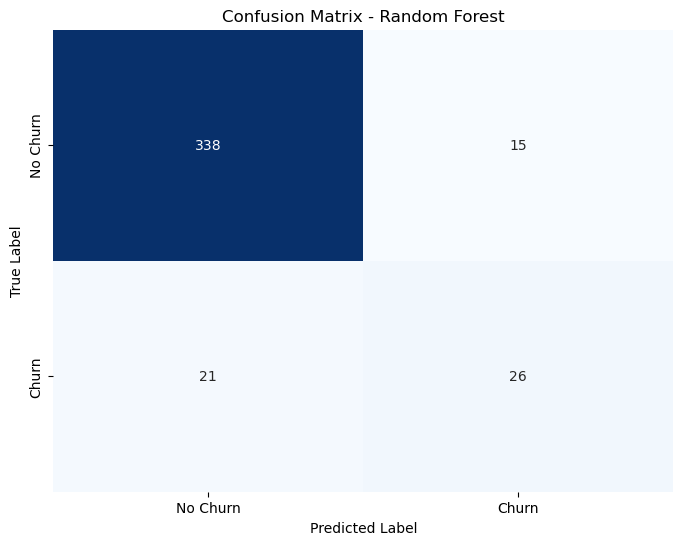

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [28]:
# ignore codes below.. 
# just for trial

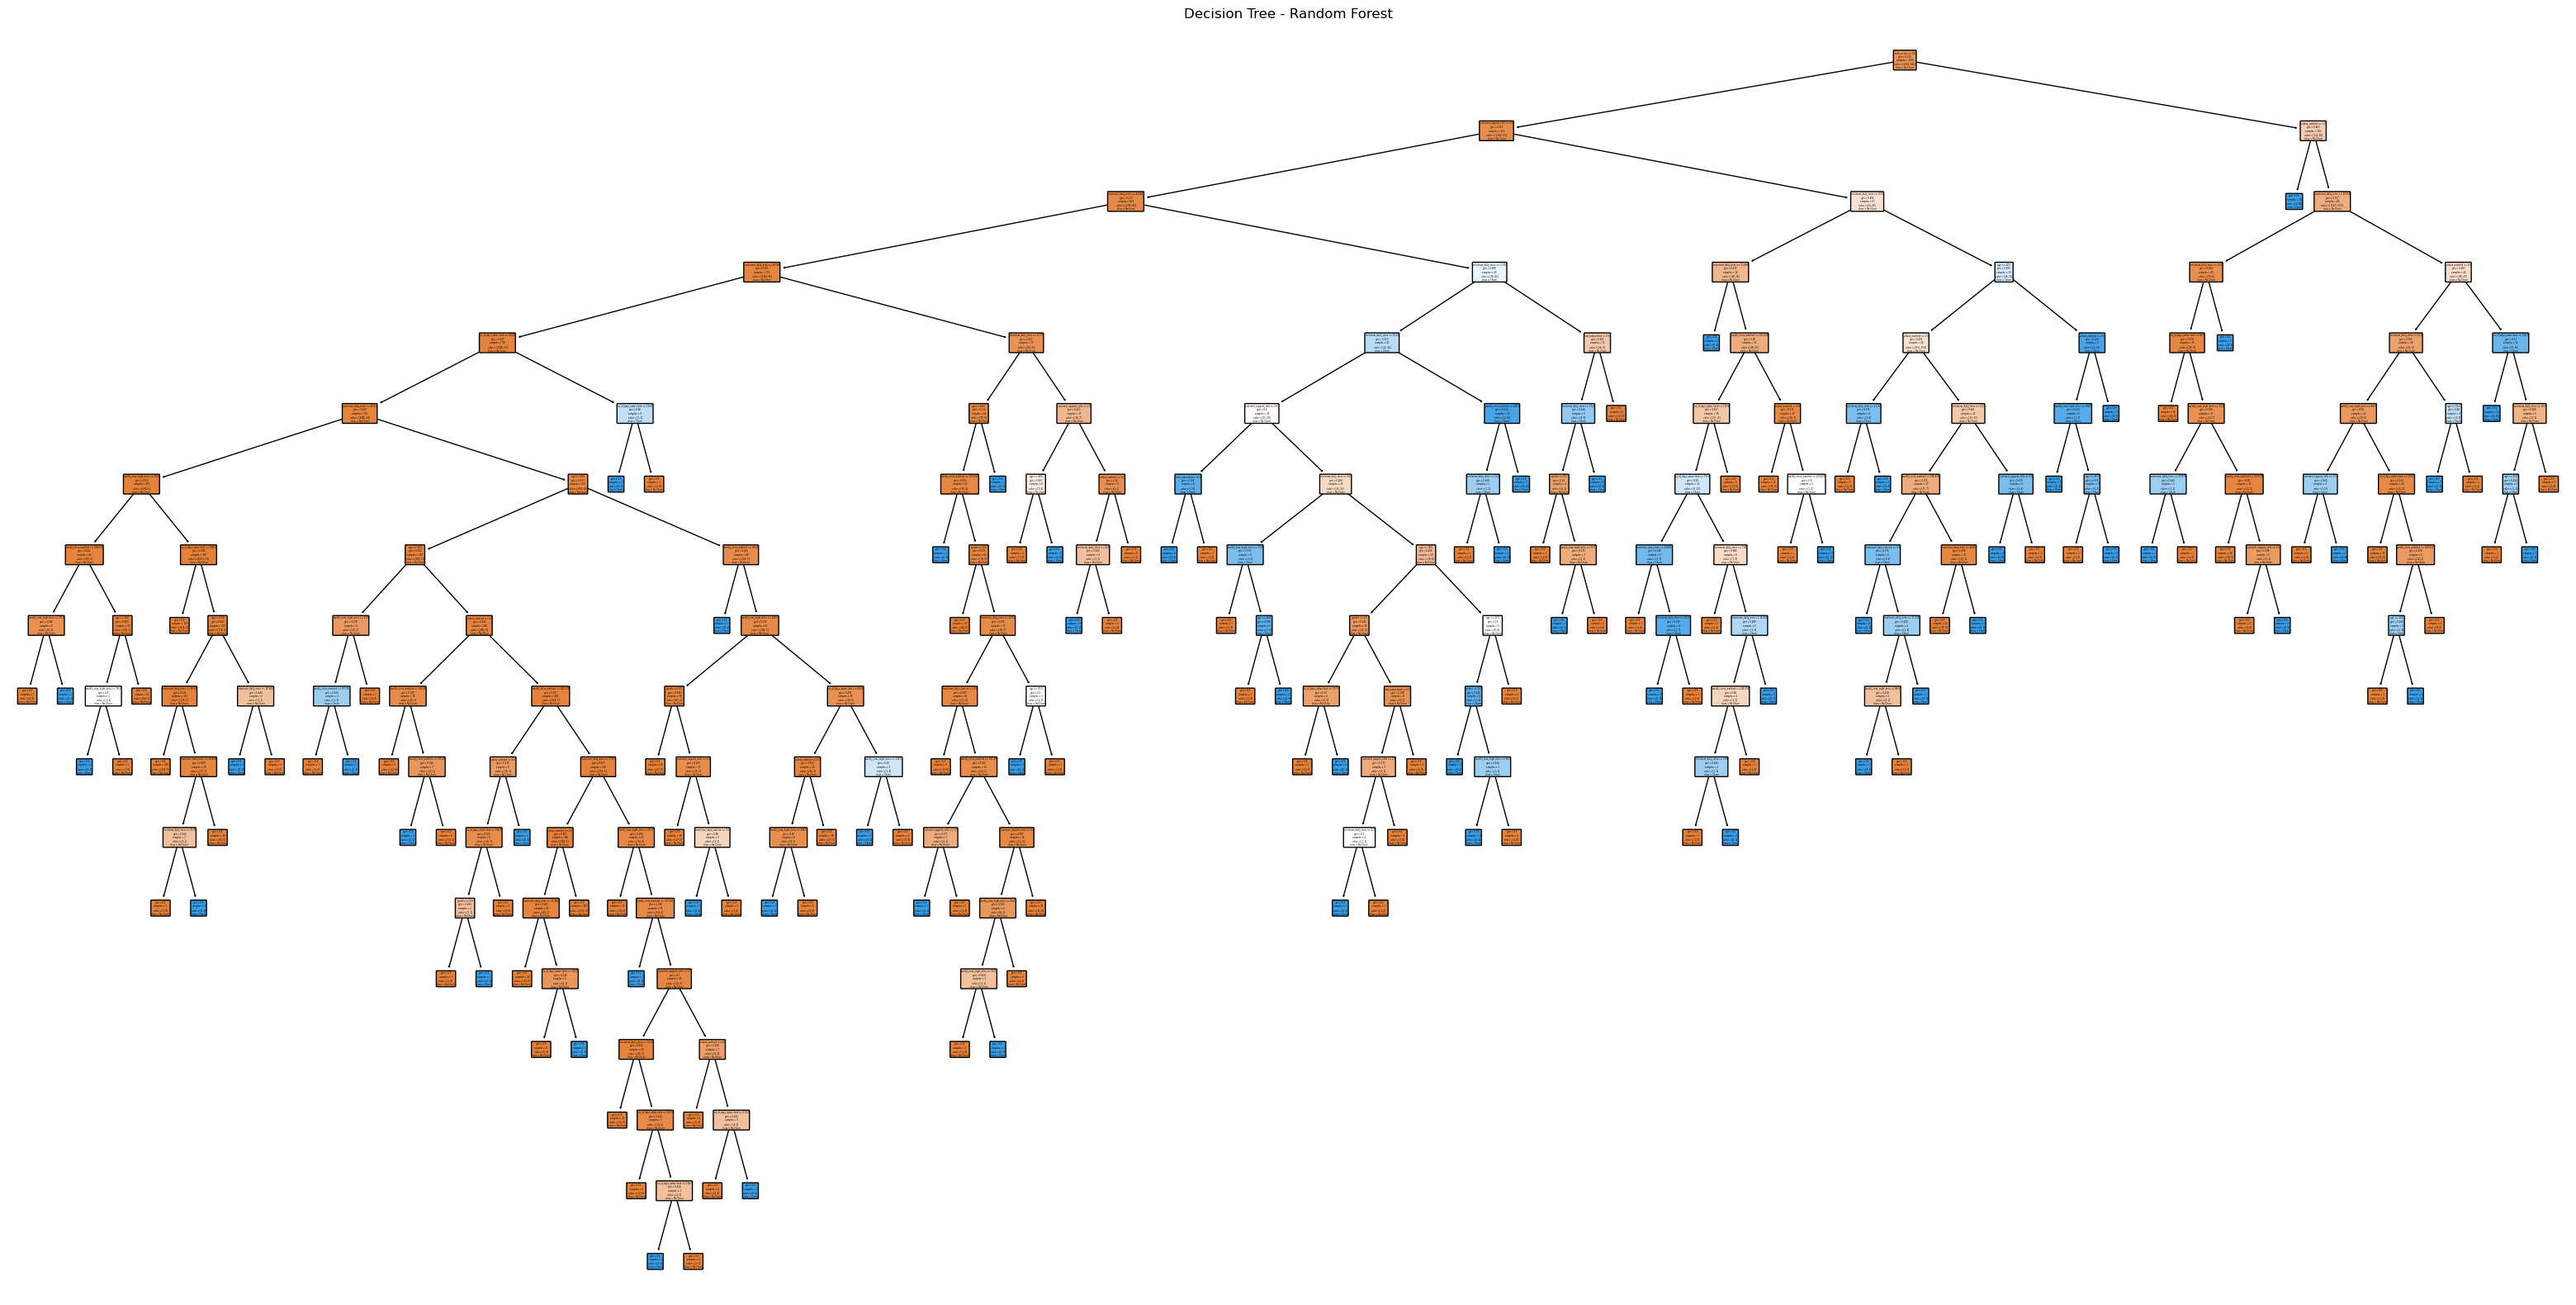

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the Random Forest
plt.figure(figsize=(40, 20))
plot_tree(rf_clf.estimators_[0], feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.title("Decision Tree - Random Forest")
plt.show()